In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from self_functions import *
from matplotlib.animation import FuncAnimation

In [2]:
# 定义矩阵 D: D is the incidence matrix, row:5 agents, colomn:7 edges
D = np.array([
    [1, 1, 1, 0, 0, 0, 0],
    [-1, 0, 0, 1, 1, 0, 0],
    [0, -1, 0, -1, 0, 1, 1],
    [0, 0, -1, 0, 0, -1, 0],
    [0, 0, 0, 0, -1, 0, -1]
])

# 计算矩阵 L = D * D'
L = np.dot(D, D.T)

# 计算矩阵 H = D'
H = D.T

# 打印结果
print("矩阵 D:")
print(D)
print("\n矩阵 L = D * D':")
print(L)
print("\n矩阵 H = D':")
print(H)

矩阵 D:
[[ 1  1  1  0  0  0  0]
 [-1  0  0  1  1  0  0]
 [ 0 -1  0 -1  0  1  1]
 [ 0  0 -1  0  0 -1  0]
 [ 0  0  0  0 -1  0 -1]]

矩阵 L = D * D':
[[ 3 -1 -1 -1  0]
 [-1  3 -1  0 -1]
 [-1 -1  4 -1 -1]
 [-1  0 -1  2  0]
 [ 0 -1 -1  0  2]]

矩阵 H = D':
[[ 1 -1  0  0  0]
 [ 1  0 -1  0  0]
 [ 1  0  0 -1  0]
 [ 0  1 -1  0  0]
 [ 0  1  0  0 -1]
 [ 0  0  1 -1  0]
 [ 0  0  1  0 -1]]


In [3]:
# 定义复数 ps: 要加入的机器人的初始位置
ps = 10 + 3j

# 提取实部和虚部并组成向量 Vec_ps
Vec_ps = np.array([np.real(ps), np.imag(ps)])

# 打印结果
print("复数 ps:", ps)
print("向量 Vec_ps:", Vec_ps)

复数 ps: (10+3j)
向量 Vec_ps: [10.  3.]


In [4]:
# 维度 d: dimension is 2, agents moves in 2-dimensional world
d = 2

# 获取矩阵 D 的大小: n is num of agents, m is num of edges
n, m = D.shape

# 定义 r 矩阵: r is the initial positions of the agents
r = np.array([
    [0.5, 0.5],
    [0.5, -0.5],
    [0, 0],
    [-1, 1],
    [-1, -1]
])

# 定义 r_0 矩阵: r_0 is the initial positions of the agents in complex number
r_0 = np.array([0.5+0.5j,
       0.5-0.5j,
       0  +  0j,
       -1 +  1j,
       -1 -  1j
])

# 通过邻接矩阵 D 求取边集 edge
"""
D = 
[[ 1  1  1  0  0  0  0]
 [-1  0  0  1  1  0  0]
 [ 0 -1  0 -1  0  1  1]
 [ 0  0 -1  0  0 -1  0]
 [ 0  0  0  0 -1  0 -1]]

"""
# 找到 D 中非零元素的索引
non_zero_indices_row, non_zero_indices_col = np.where(D != 0)
# 计算 non_zero_indices
non_zero_indices = sorted(non_zero_indices_row + non_zero_indices_col * n + 1)
# 将索引转换为 Mx2 的矩阵
edge = np.mod(np.reshape(non_zero_indices, (m, 2)), n)
# 将 0 替换为 n
edge[edge == 0] = n

# 打印结果
print("矩阵 D:")
print(D)
print("\n维度 d:", d)
print("\n矩阵 r:")
print(r)
print("\n边集 edge:")
print(edge)

矩阵 D:
[[ 1  1  1  0  0  0  0]
 [-1  0  0  1  1  0  0]
 [ 0 -1  0 -1  0  1  1]
 [ 0  0 -1  0  0 -1  0]
 [ 0  0  0  0 -1  0 -1]]

维度 d: 2

矩阵 r:
[[ 0.5  0.5]
 [ 0.5 -0.5]
 [ 0.   0. ]
 [-1.   1. ]
 [-1.  -1. ]]

边集 edge:
[[1 2]
 [1 3]
 [1 4]
 [2 3]
 [2 5]
 [3 4]
 [3 5]]


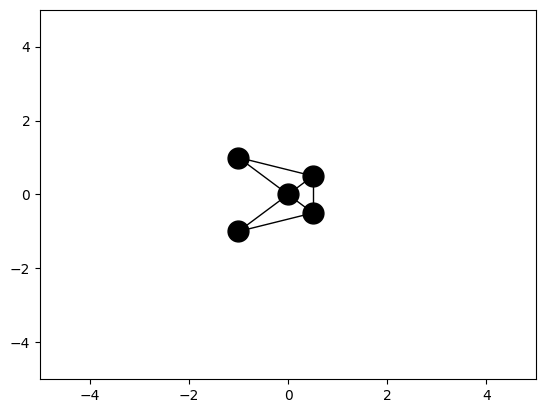

In [5]:
# 绘图
plt.figure()

# 绘制边（黑色线段）
for i in range(edge.shape[0]):
    start_point = r[edge[i, 0] - 1]
    end_point = r[edge[i, 1] - 1]
    plt.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], 'k', linewidth=1)

# 绘制节点（黑色点）
for i in range(r.shape[0]):
    plt.plot(r[i, 0], r[i, 1], 'k.', markersize=30)

# 绘制要加入的节点（红色点）
plt.plot(Vec_ps[0], Vec_ps[1], 'r.', markersize=30)

# 设置坐标轴范围
plt.axis([-5, 5, -5, 5])

# 显示图形
plt.show()

In [6]:
# construct weights W
W = np.zeros((n, n), dtype=np.complex128)
for i in range(n):
    NBR = SrchNbr(i+1, edge)    # Convert to 1-based index
    Wi = compute_weight_i(NBR, r_0, i+1, n)
    W[i] = Wi
    sum_i = 0
    for j in range(n):
        sum_i -= Wi[j]
    W[i, i] = sum_i

# examinate the result
print("矩阵 W:")
print(W)
print("\nW * r_0:")
print(np.dot(W, r_0))

# construct M_relat
M_relat = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i == j:
            M_relat[i, j] = 0
        else:
            if W[i, j] != 0. +0.j:
                M_relat[i, j] = 1
            else:
                M_relat[i, j] = 0
print("\n矩阵 M_relat:")
print(M_relat)

矩阵 W:
[[ 3. -3.j  -2. +0.j  -1.5+1.5j  0.5+1.5j  0. +0.j ]
 [-2. +0.j   3. +3.j  -1.5-1.5j  0. +0.j   0.5-1.5j]
 [-1.5-0.5j -2.5-0.5j  6. +3.j  -2. -1.j   0. -1.j ]
 [ 1. -1.j   0. +0.j  -1.5+0.5j  0.5+0.5j  0. +0.j ]
 [ 0. +0.j   1. +1.j  -1.5-0.5j  0. +0.j   0.5-0.5j]]

W * r_0:
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]

矩阵 M_relat:
[[0. 1. 1. 1. 0.]
 [1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 1. 0. 0.]]


In [7]:
# choose leaders: choose the last two agents as leaders
Wf = W[0:n-2, :]
Wfl = W[0:n-2, n-2:]
Wff = W[0:n-2, 0:n-2]

# verify the position of followers which is determined by the chosen leaders
rL = r_0[n-2:]
rF = -np.linalg.inv(Wff) @ Wfl @ rL

# examinate the result
print("矩阵 Wf:")
print(Wf)
print("\n矩阵 Wfl:")
print(Wfl)
print("\n矩阵 Wff:")
print(Wff)
print("\nPositions rL:")
print(rL)
print("\nPositions rF:")
print(rF)

矩阵 Wf:
[[ 3. -3.j  -2. +0.j  -1.5+1.5j  0.5+1.5j  0. +0.j ]
 [-2. +0.j   3. +3.j  -1.5-1.5j  0. +0.j   0.5-1.5j]
 [-1.5-0.5j -2.5-0.5j  6. +3.j  -2. -1.j   0. -1.j ]]

矩阵 Wfl:
[[ 0.5+1.5j  0. +0.j ]
 [ 0. +0.j   0.5-1.5j]
 [-2. -1.j   0. -1.j ]]

矩阵 Wff:
[[ 3. -3.j  -2. +0.j  -1.5+1.5j]
 [-2. +0.j   3. +3.j  -1.5-1.5j]
 [-1.5-0.5j -2.5-0.5j  6. +3.j ]]

Positions rL:
[-1.+1.j -1.-1.j]

Positions rF:
[5.00000000e-01+5.00000000e-01j 5.00000000e-01-5.00000000e-01j
 5.55111512e-17+2.22044605e-16j]


In [8]:
# trajectory
# Define via points
via = np.array([
    [0, 0],
    [5, 0],
    [10, 0],
    [10, -10],
    [10, -20],
    [5, -20],
    [0, -20],
    [0, -10],
    [0, 0]
])

# Initialize variables
num_rand = np.random.rand()
ra = np.zeros((n, 2, via.shape[0]))
qvia = np.zeros((via.shape[0], 6))

for j in range(via.shape[0]):
    if j % 2 != 0:
        if j == 3 or j == 7:
            T1 = np.diag([2, 1])
        else:
            T1 = np.diag([1, 0.5])
    else:
        T1 = np.eye(2)

    T2 = rot2(-np.pi / 2 * np.floor((j - 1) / 2))  # Rotate every two steps
    ra[:, :, j] = r @ T2.transpose() @ T1.transpose() + via[j, :]
    T = np.dot(T1, T2)
    qvia[j, :] = np.concatenate((T.flatten(), via[j, :]))

# Generate trajectory
qr,dqr,ddqr,tr = mstraj_(qvia, 6, 0.03, 0.2)

# Print results
print("Generated trajectory qr:")
print(qr)
print("Time sequence tr:")
print(tr)

Generated trajectory qr:
[[ 6.12323400e-17 -1.00000000e+00  1.00000000e+00  6.12323400e-17
   0.00000000e+00  0.00000000e+00]
 [ 5.64971751e-03 -9.94350282e-01  9.94350282e-01  2.82485876e-03
   2.82485876e-02  0.00000000e+00]
 [ 1.12994350e-02 -9.88700565e-01  9.88700565e-01  5.64971751e-03
   5.64971751e-02  0.00000000e+00]
 ...
 [-1.84797002e-16 -1.00598802e+00  1.00000000e+00 -1.83697020e-16
   0.00000000e+00 -5.98802395e-02]
 [-1.84247011e-16 -1.00299401e+00  1.00000000e+00 -1.83697020e-16
   0.00000000e+00 -2.99401198e-02]
 [-1.83697020e-16 -1.00000000e+00  1.00000000e+00 -1.83697020e-16
   0.00000000e+00  0.00000000e+00]]
Time sequence tr:
[0.000e+00 3.000e-02 6.000e-02 ... 6.126e+01 6.129e+01 6.132e+01]


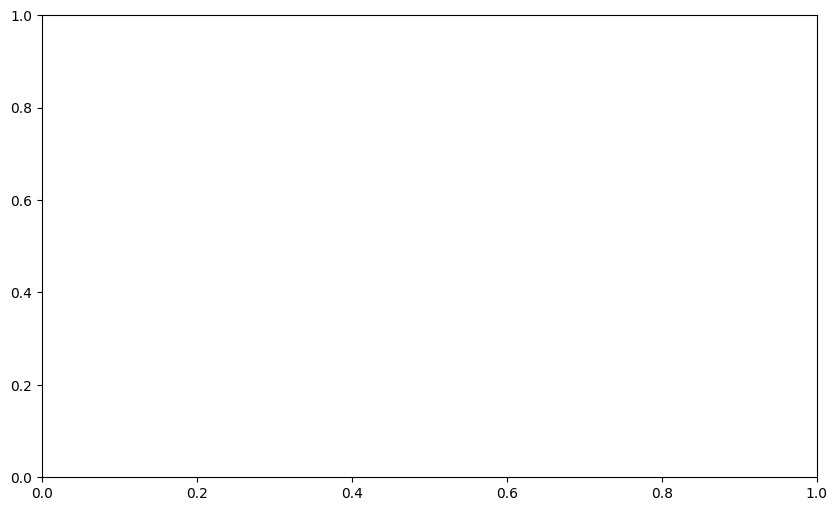

In [ ]:
# 初始化
x0 = r_0  # 初始位置
v0 = np.zeros((n, 1), dtype=complex)  # 初始速度
x_t = x0.copy()
v_t = v0.copy()
x_atk = x0[1].copy()  # 攻击者初始位置

Vec_xL_t_0 = r[n-2:]    # 领导者初始位置，向量表示
Vec_vL_t_0 = np.array([[0, 0], [0, 0]])  # 领导者初始速度，向量表示

# 参数设定
thres_add = 0.05
dt = 0.5
loop = 0
aL = 1  # 领导者控制参数
aF = 0.4  # 跟随者控制参数
L = 0.5
getT = 0
Wchanged = 0
a_s = 3
thres_us = 0.5

# 跟踪误差
# err_track = np.zeros((5, 1))

# 初始化记录
# err_all = np.zeros((5, 1000))
# x_all = np.zeros((5, 1000))
# err_atk_all = np.zeros((1, 1000))
# v_all = np.zeros((5, 1000))
# ps_all = np.zeros((1, 1000))

# 初始化视频记录
# frames = []

# 主循环
def update(frame):
# while loop < qr.shape[0]:
    # t时刻，领导者目标位置
    A = qr[loop, :4].reshape(2, 2)
    b = qr[loop, 4:6]
    Vec_xL_t = Vec_xL_t_0 @ A.T + b # 向量表示
    xL_target = Vec_xL_t[:, 0] + 1j * Vec_xL_t[:, 1]    # 复数表示

    # 领导者速度更新
    
    for i in range(n - 2, n):
        v_t[i] = -aL * (np.tanh(np.real(x_t[i] - xL_target[i - (n - 2)])) +
                        1j * np.tanh(np.imag(x_t[i] - xL_target[i - (n - 2)])))

    # 跟随者速度更新
    xF_target = -np.linalg.inv(Wff) @ Wfl @ xL_target
    v_t[:n - 2] = (-aF * (x_t[:n - 2] + np.linalg.inv(Wff) @ Wfl @ x_t[n - 2:n])).reshape(n-2,1) - \
                  np.linalg.inv(Wff) @ Wfl @ v_t[n - 2:n]

    # 位置更新
    x_t += (v_t * dt).flatten()
    x_atk += v_t[1] * dt

    # 记录数据
    # err_track = x_t[:5] - xL_target
    # err_atk = x_atk - x_t[1]
    # err_all[:, loop - 1] = np.real(err_track.flatten())
    # x_all[:, loop - 1] = np.real(x_t[:5].flatten())
    # err_atk_all[:, loop - 1] = np.real(err_atk)
    # v_all[:, loop - 1] = np.real(v_t[:5].flatten())
    # ps_all[:, loop - 1] = np.real(x_atk)

    # 可视化
    # plt.figure(figsize=(8, 8))
    ax.plot(np.real(x_t[:]), np.imag(x_t[:]), 'k.', markersize=20)
    ax.plot(np.real(x_atk), np.imag(x_atk), 'r.', markersize=20)
    ax.xlim(-10, 10)
    ax.ylim(-10, 10)
    ax.title(f"Loop {loop}")
    ax.grid(True)
    # plt.pause(0.01)
    # plt.close()

    # 保存帧
    # frame = plt.gcf()
    # frames.append(frame)

    loop += 1

fig, ax = plt.subplots(figsize=(10, 6))
ani = FuncAnimation(fig, update, frames=int(qr.shape[0]), interval=1)

plt.show()

In [17]:
np.zeros(5)

array([0., 0., 0., 0., 0.])